In [1]:
import cv2
import os
import sys
import numpy
import matplotlib.pyplot as plt
from itertools import permutations
import operator
import random
from functools import reduce

In [2]:
def fitness(target, population):
    
    n = population.shape[0]
    res = numpy.zeros(n)
    for i in range(n):
        res[i] = numpy.sum(target) - numpy.mean(numpy.abs(target- population[i,:]))
    return res

In [3]:
def choose_parents(res_fitness,population,n):
     
    n1 = population.shape[1]
    parents = numpy.empty((n,n1))
    
    for i in range(n):
        index = numpy.where(res_fitness == numpy.max(res_fitness))[0][0]
        parents[i, :] = population[index, :]
        res_fitness[index] = -1
        
    return parents

In [4]:
def crossover(n,parents,im_shape):

    n1 = parents.shape[0]
    population = numpy.empty(shape=(n, reduce(operator.mul, im_shape)), dtype=numpy.uint8)
    population[0:n1,:] = parents
    n2 = n-n1
    
    # permutation
    p_parents= list(permutations(iterable=numpy.arange(0,n1), r=2))
    f_permutation = random.sample(range(len(p_parents)), n2)
    
    for i in range(len(f_permutation)):
        
        c0 = p_parents[f_permutation[i]][0]
        c1 = p_parents[f_permutation[i]][1]
        population[n1+i, 0:int(population.shape[1]/2)] = parents[c0,0:int(population.shape[1]/2)]
        population[n1+i, int(population.shape[1]/2):] =  parents[c1, int(population.shape[1]/2):]
    
    return population


In [5]:
def mutation(n,population, mutation_rate):

    for i in range(n, population.shape[0]):
        n1 =population.shape[1]
        index = numpy.uint32(numpy.random.random(size=numpy.uint32(mutation_rate/100*n1))*n1)
        population[i, index] = numpy.uint8(numpy.random.random(size=index.shape[0])*256)
    return population


In [8]:
path=input()

dog.jpg


In [9]:
image = cv2.imread(path)
im_shape = image.shape

In [10]:
cv2.imshow('image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
# encoding
target = numpy.reshape(a=image, newshape=(reduce(operator.mul, im_shape)))

In [12]:
n = 10
primary_population = numpy.empty(shape=(n,reduce(operator.mul, im_shape)))
for i in range(n):
    primary_population[i,:] = numpy.random.random(reduce(operator.mul, im_shape))
    primary_population[i,:] *=256

In [13]:
# Mutation percentage
mutation_percent = .01
population = primary_population

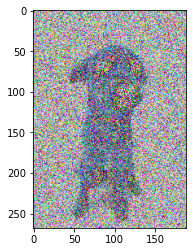

In [14]:
for iteration in range(60000):
    
    fitness_res = fitness(target, population)
    parents = choose_parents(fitness_res,population, 5)
    population = crossover(n, parents, im_shape)
    population = mutation( 5, population,0.01)
    if iteration == 59999:
        chromosome  = population[numpy.where(fitness_res == numpy.max(fitness_res))[0][0],:]    
        img = numpy.reshape(chromosome , newshape=im_shape)
        plt.imshow(img )
   
